In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## We consider a city with randomly places points

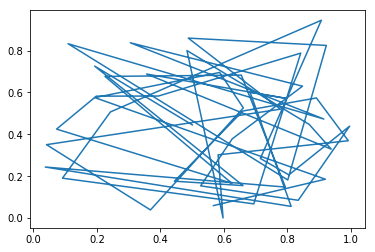

In [8]:
NB_TOWNS = 50
X = [np.random.rand() for i in range(NB_TOWNS)]
Y = [np.random.rand() for i in range(NB_TOWNS)]
np.random.seed(42)
plt.figure()
plt.plot(X,Y,'-')

# We define a few functions to compute "greedy-updates"

In [9]:
def cost(X,Y,sigma):
    c = 0
    for i in range(len(sigma)):
        c += (X[sigma[(i+1)%NB_TOWNS]]-X[sigma[i]])**2 + (Y[sigma[(i+1)%NB_TOWNS]] - Y[sigma[i]])**2
    return c

def plot_switched(X,Y,sigma,times,costs):
    Xm = [X[i] for i in sigma]
    Ym = [Y[i] for i in sigma]
    Xm.append(X[sigma[0]])
    Ym.append(Y[sigma[0]])
    plt.clf()
    plt.subplot(1,2,1)
    plt.plot(Xm,Ym)
    plt.plot(Xm,Ym,'+')
    plt.subplot(1,2,2)
    plt.plot(times,costs)
    plt.plot([0,max(times)],[min(costs),min(costs)],'--')
    plt.xlabel('min_costs={}'.format(min(costs)))

def switch_two_cities(sigma,i,j):
    sigma_new = [i for i in sigma]
    sigma_new[i] = sigma[j]
    sigma_new[j] = sigma[i]
    return sigma_new

def switch_two_random_cities(sigma):
    return switch_two_cities(sigma,np.random.randint(len(sigma)-1), np.random.randint(len(sigma)-1) )


In [10]:
class Country:
    def __init__(self):
        self.sigma = [i for i in range(NB_TOWNS)]
        self.sigmas = [np.copy(range(NB_TOWNS))]
        self.costs = [cost(X,Y,self.sigma)]
        self.times = [0]
        self.t = 0

    def greedy_temperature(self,temperature, nb_iterations=30000):
        for tmp in range(nb_iterations):
            self.t += 1
            sigma_new = switch_two_random_cities(self.sigma)
            newCost = cost(X,Y,sigma_new)
            if newCost < self.costs[-1] or (temperature>0 and 
                                       np.random.rand() <= np.exp( (- newCost + self.costs[-1])/temperature )):
                self.sigmas.append(np.copy(sigma_new))
                self.sigma = sigma_new
                self.times.append(self.t)
                self.costs.append(newCost)
c = Country();
np.random.seed(42)
temperatures = [1,0,.1,0,0.01]
for temperature in temperatures:
    c.greedy_temperature(temperature, nb_iterations=10000)
c.greedy_temperature(temperatures[-1])
c.greedy_temperature(temperatures[-1],nb_iterations=100)

 200##
 800

(None,)

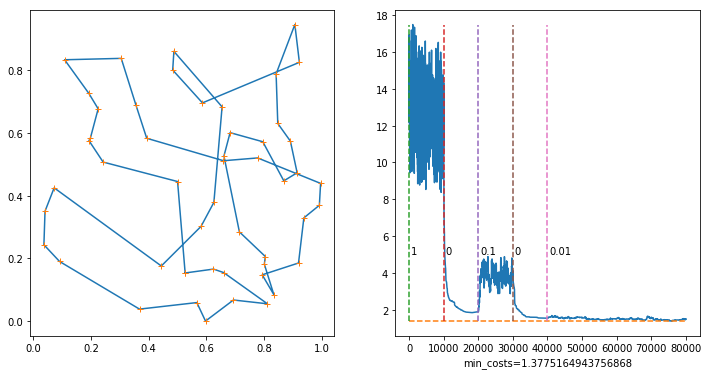

In [11]:
def plot_VC(t,sigmas,costs,times,line=None):
    fig=plt.figure(1)
    print('\r',t,end='')
    fig.set_size_inches(12,6)
    plt.clf()
    idx = next(i for i in range(len(times)) if t*100 < times[i])
    #print(idx)
    plot_switched(X,Y,sigmas[idx+1],times[:idx+1],costs[:idx+1])
    for i,x in enumerate(range(0,int(min(t,len(temperatures)*100)),100)):
        plt.plot([100*x,100*x],[min(costs),max(costs)],'--')
        plt.text(100*x+500,5,"{}".format(temperatures[i]))
    return line,
fig = plt.figure()
plot_VC(200,c.sigmas,c.costs,c.times)
fig.savefig('simulated_annealing_image.pdf',bbox_inches='tight')
print("##")
#figure = 
plot_VC(800,c.sigmas,c.costs,c.times)

In [12]:
## Test of animation

 0##
 799

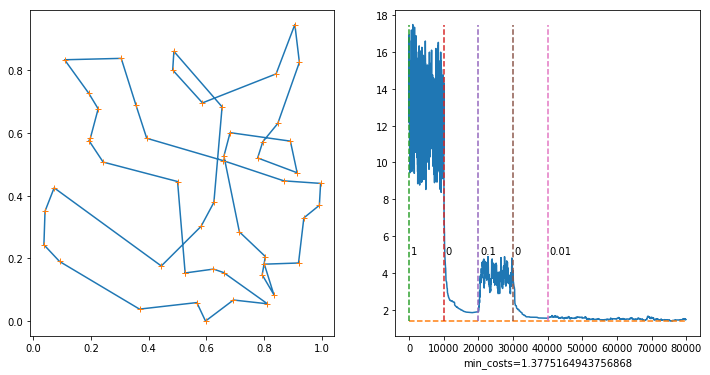

In [13]:
import matplotlib.animation as animation

fig1 = plt.figure()
#plt.subplot(2,1,1)
line, = plt.plot([0,1],[1,1])
ani = animation.FuncAnimation(fig1, plot_VC, frames=800, fargs=(c.sigmas,c.costs,c.times,line),
                                   interval=100, blit=True)
print("##")
ani.save('simulated_annealing.mp4')